In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os
from PIL import Image
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image

In [2]:
# 5 classes' name
class_names = ['run', 'slide', 'sprint', 'jump']

In [3]:
# Set image dimensions and the number of classes (for categorical labels)
image_size = (224, 224)
num_classes = 4

In [4]:
def load_images_from_folder(folder_path, image_size):
    images = []
    labels = [] 
    
    for class_label, class_folder in enumerate(os.listdir(folder_path)):
        class_path = os.path.join(folder_path, class_folder)
        if os.path.isdir(class_path):
            for filename in os.listdir(class_path):
                img_path = os.path.join(class_path, filename)
                
                try:
                    # Load image and convert to RGB
                    img = Image.open(img_path).convert('RGB')
                    # Resize to the desired shape
                    img = img.resize(image_size)
                    # Convert image to NumPy array
                    img_array = np.array(img)
                    # Append image and corresponding label
                    images.append(img_array)
                    labels.append(class_label)
                except Exception as e:
                    print(f"Error loading image {img_path}: {e}")
                    continue

    # Convert lists to NumPy arrays
    images = np.array(images)
    labels = np.array(labels)
    
    # Normalize pixel values to the range [0, 1]
    images = images / 255.0
    
    # One-hot encode the labels
    labels = to_categorical(labels, num_classes)
    
    return images, labels


In [5]:
# Set the path to your images folder
folder_path = 'data'

# Load and preprocess images
images, labels = load_images_from_folder(folder_path, image_size)

# Check the shape of the data
print('Images shape:', images.shape)  # Should be (num_images, image_size[0], image_size[1], 3) for RGB images
print('Labels shape:', labels.shape)  # Should be (num_images, num_classes)

Images shape: (2029, 224, 224, 3)
Labels shape: (2029, 4)


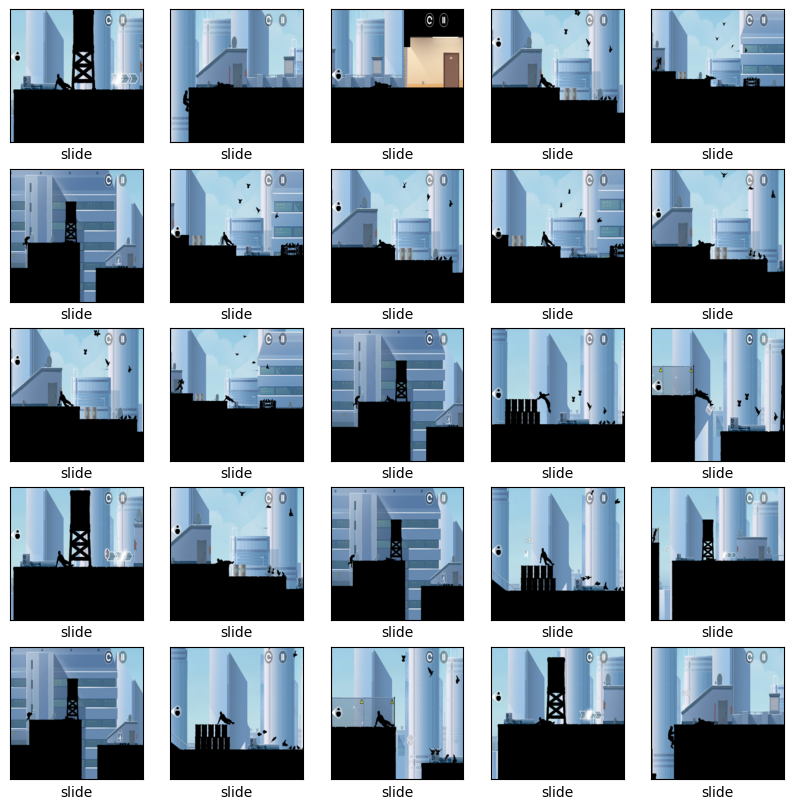

In [6]:
plt.figure(figsize=(10,10))
for i in range(725, 750):
    plt.subplot(5,5,i-725+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[np.argmax(labels[i])])
plt.show()

In [7]:
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

# Check the shapes of the resulting datasets
print('Train images shape:', train_images.shape)
print('Train labels shape:', train_labels.shape)
print('Test images shape:', test_images.shape)
print('Test labels shape:', test_labels.shape)

Train images shape: (1623, 224, 224, 3)
Train labels shape: (1623, 4)
Test images shape: (406, 224, 224, 3)
Test labels shape: (406, 4)


In [18]:
model = tf.keras.Sequential(
    [
        tf.keras.Input(shape=(224, 224, 3)), 
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),  
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),  
        layers.Dense(128, activation="relu"), 
        layers.Dense(num_classes, activation="softmax"),  
    ]
)

# model = tf.keras.Sequential(
#     [
#         tf.keras.Input(shape=(224, 224, 3)), 
#         layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
#         layers.MaxPooling2D(pool_size=(2, 2)),
#         layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
#         layers.MaxPooling2D(pool_size=(2, 2)),
#         layers.Flatten(),
#         layers.Dropout(0.5),  # Dropout to prevent overfitting
#         layers.Dense(num_classes, activation="softmax"),  # Output layer for classification
#     ]
# )

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,476 (42.61 MB)

 Trainable params: 11,169,476 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

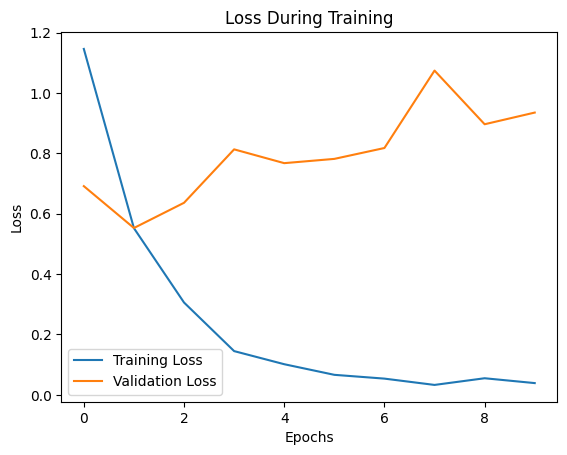

In [20]:
batch_size = 32
epochs = 10
history = model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, validation_split=0.2, verbose = 0)

# Plot the loss graph
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 217ms/step


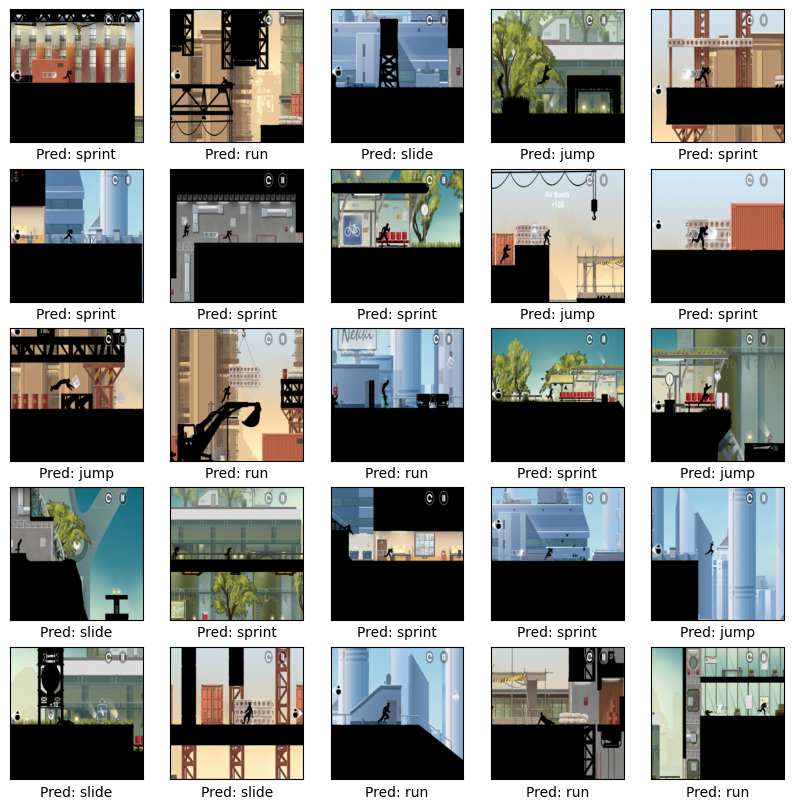

In [11]:
# Make predictions on the test dataset
predictions = model.predict(test_images)

# Convert the predicted probabilities to class indices
predicted_classes = np.argmax(predictions, axis=1)

# Convert one-hot encoded test_labels to class indices for comparison
true_classes = np.argmax(test_labels, axis=1)

# Define how many images you want to display
num_images_to_show = 25

plt.figure(figsize=(10, 10))
for i in range(num_images_to_show):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    
    # Display the predicted class and the true class
    plt.xlabel(f"Pred: {class_names[predicted_classes[i]]}")
    
plt.show()

In [21]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

print(f'Test accuracy: {test_accuracy}')
print(f'Test loss: {test_loss}')

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - accuracy: 0.8611 - loss: 0.6348
Test accuracy: 0.8522167205810547
Test loss: 0.7194303870201111


Shape of the new image: (1, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


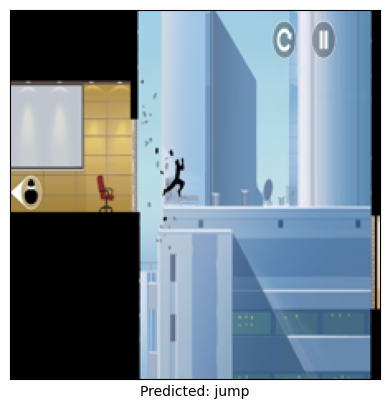

In [22]:
# Function to load and preprocess the new image
def load_and_preprocess_image(img_path):
    img = Image.open(img_path).convert('RGB')  # Load the image
    img = img.resize((224, 224))  # Resize the image to 224x224
    img_array = np.array(img)  # Convert to NumPy array
    img_array = img_array / 255.0  # Normalize to [0, 1]
    
    if len(img_array.shape) == 3:
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    
    return img_array

# Path to the new image
new_image_path = 'test.png'

# Preprocess the image
new_image = load_and_preprocess_image(new_image_path)

# Check the shape of the new image
print(f"Shape of the new image: {new_image.shape}")

# Make a prediction (ensure the input has shape (1, 224, 224, 3))
try:
    prediction = model.predict(new_image)

    # Convert the predicted probabilities to the class index
    predicted_class = np.argmax(prediction, axis=1)

    # Display the image and the predicted class
    plt.imshow(np.squeeze(new_image))  # Remove batch dimension
    plt.xticks([])
    plt.yticks([])

    # Assuming `class_names` is a list of class labels
    plt.xlabel(f"Predicted: {class_names[predicted_class[0]]}")
    plt.show()

except Exception as e:
    print(f"Error: {e}")
